Columns: ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
R² on test set: 0.691
MSE on test set: 28.871


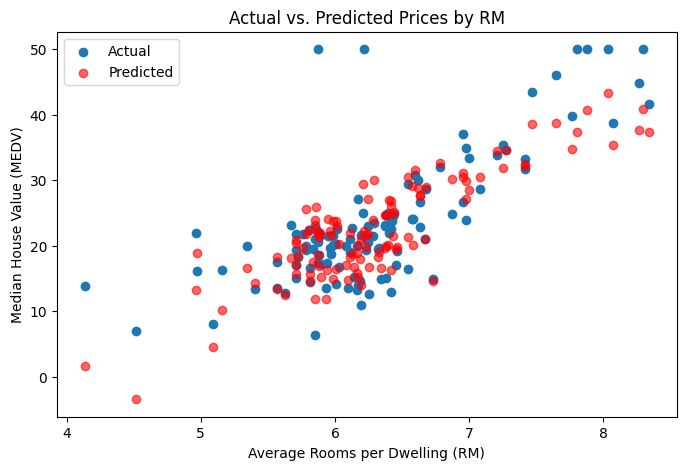

In [11]:
import pandas as pd                                      # data handling with pandas :contentReference[oaicite:3]{index=3}
import numpy as np                                       # numerical ops :contentReference[oaicite:4]{index=4}
import matplotlib.pyplot as plt                          # plotting :contentReference[oaicite:5]{index=5}
from sklearn.model_selection import train_test_split     # train/test split :contentReference[oaicite:6]{index=6}
from sklearn.linear_model import LinearRegression        # OLS linear model :contentReference[oaicite:7]{index=7}
from sklearn.metrics import r2_score, mean_squared_error # evaluation metrics :contentReference[oaicite:8]{index=8}
from sklearn.impute import SimpleImputer                 # basic missing-value imputer :contentReference[oaicite:9]{index=9}

# 1. Load dataset and inspect columns
boston = pd.read_csv(r"C:\ThirdYear_Notes\Practicals\DSBDA\HousingData.csv")
print("Columns:", boston.columns.tolist())
# Expected columns: ['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT','MEDV'] :contentReference[oaicite:10]{index=10}

# 2. Define features and target (use 'MEDV')
target_col = 'MEDV'
feature_cols = [c for c in boston.columns if c != target_col]
X = boston[feature_cols]
y = boston[target_col]

# 3. Handle missing values
# Option A: Drop any rows with NaN in X or y
boston_clean = boston.dropna(subset=feature_cols + [target_col])  # removes NaNs :contentReference[oaicite:11]{index=11}
X = boston_clean[feature_cols]
y = boston_clean[target_col]

# Option B: Impute missing values (uncomment to use)
# imp = SimpleImputer(strategy='mean')
# X = pd.DataFrame(imp.fit_transform(X), columns=feature_cols)
# y = pd.Series(imp.fit_transform(y.values.reshape(-1,1)).ravel())

# 4. Split into train/test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)  # 70% train, 30% test :contentReference[oaicite:12]{index=12}

# 5. Fit the Linear Regression model
lr = LinearRegression()
lr.fit(X_train, y_train)  # learns coef_ and intercept_ :contentReference[oaicite:13]{index=13}

# 6. Predict on test set
y_pred = lr.predict(X_test)

# 7. Evaluate performance
r2  = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print(f"R² on test set: {r2:.3f}")
print(f"MSE on test set: {mse:.3f}")

# 8. Visualize Actual vs. Predicted for the 'RM' feature
if 'RM' in X_test.columns:
    plt.figure(figsize=(8,5))
    plt.scatter(X_test['RM'], y_test,  label='Actual')
    plt.scatter(X_test['RM'], y_pred, color='red', alpha=0.6, label='Predicted')
    plt.xlabel('Average Rooms per Dwelling (RM)')
    plt.ylabel('Median House Value (MEDV)')
    plt.title('Actual vs. Predicted Prices by RM')
    plt.legend()
    plt.show()
